# k-means clustering (batch solution)

####### For K=2 #######
The final value for the 0-th prototype is [9.96228854e+01 4.09186319e+00 1.00928973e+03 2.24053712e+00
 2.28482015e+00 9.35405655e+06]
The final value for the 1-th prototype is [9.86231767e+01 4.32589304e+00 1.91255400e+03 2.08697989e+00
 2.16321078e+00 2.51644978e+05]





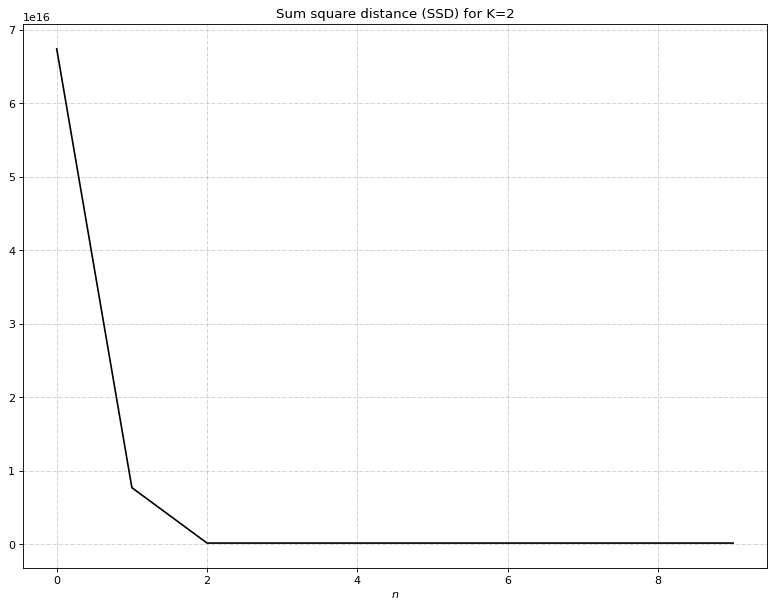

####### For K=3 #######
The final value for the 0-th prototype is [9.83846947e+01 3.90678780e+00 1.90892796e+03 2.11140731e+00
 2.18377099e+00 1.22928412e+05]
The final value for the 1-th prototype is [9.96228854e+01 4.09186319e+00 1.00928973e+03 2.24053712e+00
 2.28482015e+00 9.35405655e+06]
The final value for the 2-th prototype is [9.96244955e+01 6.08559773e+00 1.92777874e+03 1.98441601e+00
 2.07688427e+00 7.92089532e+05]





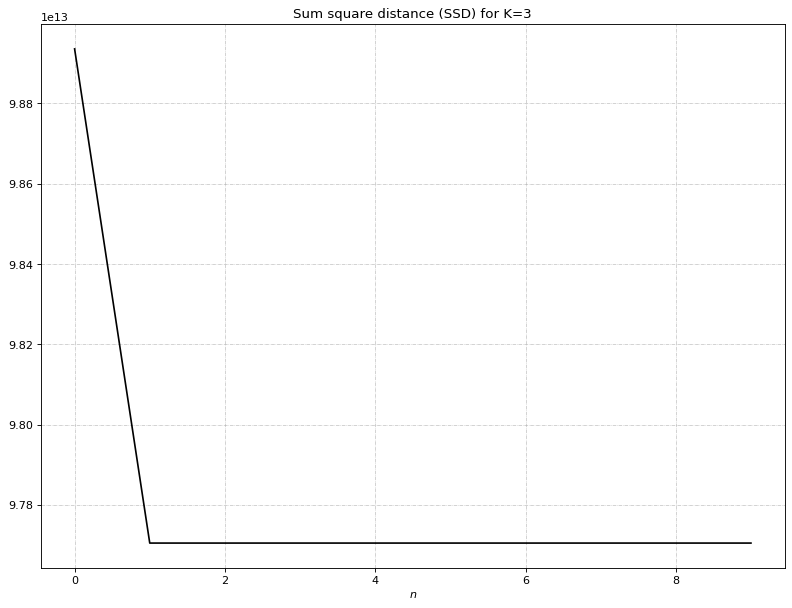

####### For K=4 #######
The final value for the 0-th prototype is [9.83822248e+01 3.90664527e+00 1.91178837e+03 2.10933897e+00
 2.18181330e+00 1.22504740e+05]
The final value for the 1-th prototype is [9.96472663e+01 5.27731647e+00 6.43193511e+02 2.24736934e+00
 2.33013906e+00 8.61877095e+05]
The final value for the 2-th prototype is [9.96228854e+01 4.09186319e+00 1.00928973e+03 2.24053712e+00
 2.28482015e+00 9.35405655e+06]
The final value for the 3-th prototype is [9.95857372e+01 7.67759647e+00 4.48531508e+03 1.48190804e+00
 1.59218166e+00 6.43632346e+05]





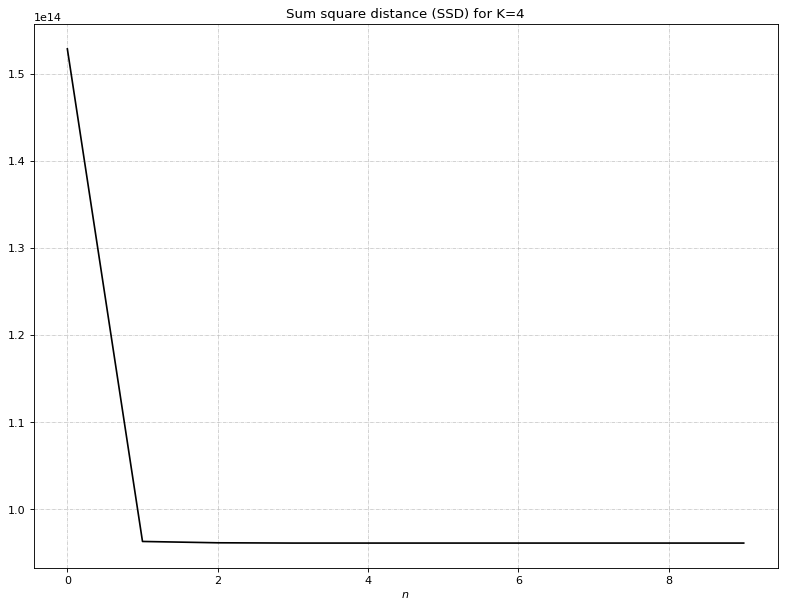

####### For K=5 #######
The final value for the 0-th prototype is [9.87500000e+01 3.60702381e+00 3.93654944e+02 3.03576996e+00
 3.04510035e+00 8.00088245e+06]
The final value for the 1-th prototype is [9.96244955e+01 6.08559773e+00 1.92777874e+03 1.98441601e+00
 2.07688427e+00 7.92089532e+05]
The final value for the 2-th prototype is [9.95628749e+01 4.06648133e+00 9.72518002e+02 2.14021189e+00
 2.18417987e+00 9.33897374e+06]
The final value for the 3-th prototype is [9.98741948e+01 4.21491669e+00 1.17498669e+03 2.33393339e+00
 2.38393722e+00 9.58153661e+06]
The final value for the 4-th prototype is [9.83846947e+01 3.90678780e+00 1.90892796e+03 2.11140731e+00
 2.18377099e+00 1.22928412e+05]





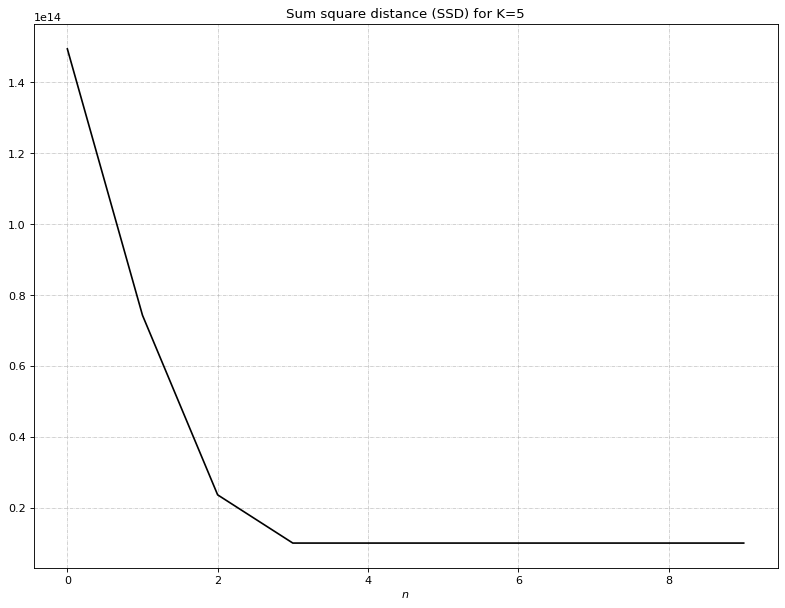

In [1]:
from numpy import genfromtxt, empty, array, argmin, amin, mean, arange, zeros
from numpy.linalg import norm
from numpy.random import permutation
import matplotlib.pyplot as plt

X = genfromtxt('./data/datasetTC3.dat', dtype=float, delimiter='\t').T

all_K = range(2,7)
p, N = X.shape
# number of iterations
N_iter = 10
# sum square distance (SSD)
SSD = empty(N_iter)
# set of all partitions
V = {}

all_K = range(2,6)
for K in all_K:
    i = permutation(N)
    # initialize W with k random instances
    W = X[:, i[:K]]
    # the minimum distance for the n-th vector and its index
    min_dist, min_disti = empty(N), empty(N, dtype=int)
    for n_iter in range(N_iter):
        # for each instance vector x
        for n in range(N):
            # all distancies from all vectors to the k-th prototype
            dist2w = array([norm(X[:,n] - W[:,k]) for k in range(K)])
            # index of the closest prototype, w, to the n-th vector
            min_dist[n], min_disti[n] = amin(dist2w), argmin(dist2w)

        # sum up all 
        SSD[n_iter] = sum(min_dist**2)

        # partition into K sets
        for k in range(K):
            # get all all instances that have the minimum distance to the k-th prototype
            V[k] = X[:, min_disti==k]
            # update the prototype
            W[:,k] = mean(V[k], axis=1)
        
    fig = plt.figure(figsize=(12, 9), dpi=80)
    ax = fig.gca()
    ax.set_axisbelow(True)
    ax.plot(SSD, 'k')
    ax.grid(True, linestyle='-.', linewidth=.5)
    plt.xlabel(r'$n$')
    plt.title(f'Sum square distance (SSD) for K={K}')
    print(f'####### For K={K} #######')
    for k in range(K):
        print(f'The final value for the {k}-th prototype is {W[:,k]}')
    print('\n\n')
    plt.show()

# K-mean clustering (sequential solution)

####### For K=2 #######
The final value for the 0-th prototype is [9.86026271e+01 4.27327933e+00 1.90962874e+03 2.09160349e+00
 2.16725085e+00 2.40736678e+05]
The final value for the 1-th prototype is [9.96142184e+01 4.14332566e+00 1.03562225e+03 2.23250842e+00
 2.27813607e+00 9.12346430e+06]



####### For K=3 #######
The final value for the 0-th prototype is [9.96228854e+01 4.09186319e+00 1.00928973e+03 2.24053712e+00
 2.28482015e+00 9.35405655e+06]
The final value for the 1-th prototype is [9.96244955e+01 6.08559773e+00 1.92777874e+03 1.98441601e+00
 2.07688427e+00 7.92089532e+05]
The final value for the 2-th prototype is [9.83846947e+01 3.90678780e+00 1.90892796e+03 2.11140731e+00
 2.18377099e+00 1.22928412e+05]



####### For K=4 #######
The final value for the 0-th prototype is [9.95648330e+01 4.06754927e+00 9.72137049e+02 2.14038047e+00
 2.18435456e+00 9.33885281e+06]
The final value for the 1-th prototype is [9.86231767e+01 4.32589304e+00 1.91255400e+03 2.08697989e+00
 2.163210

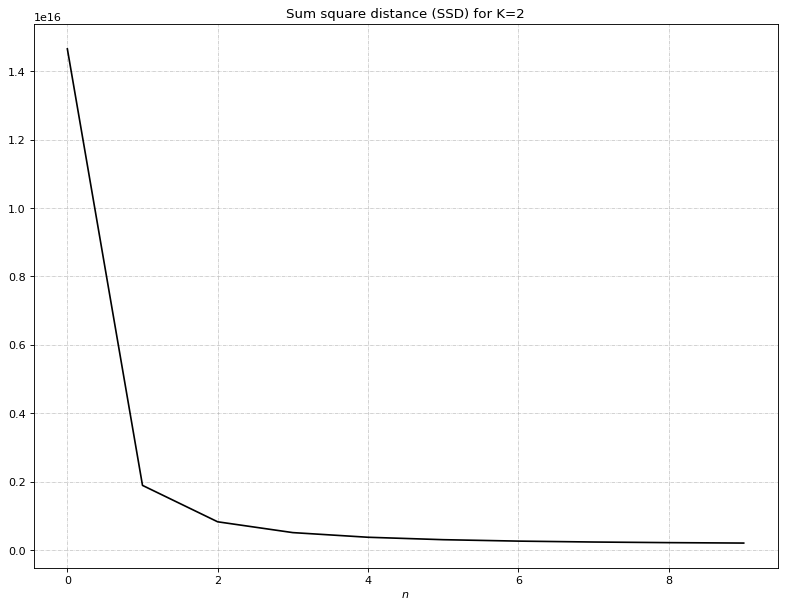

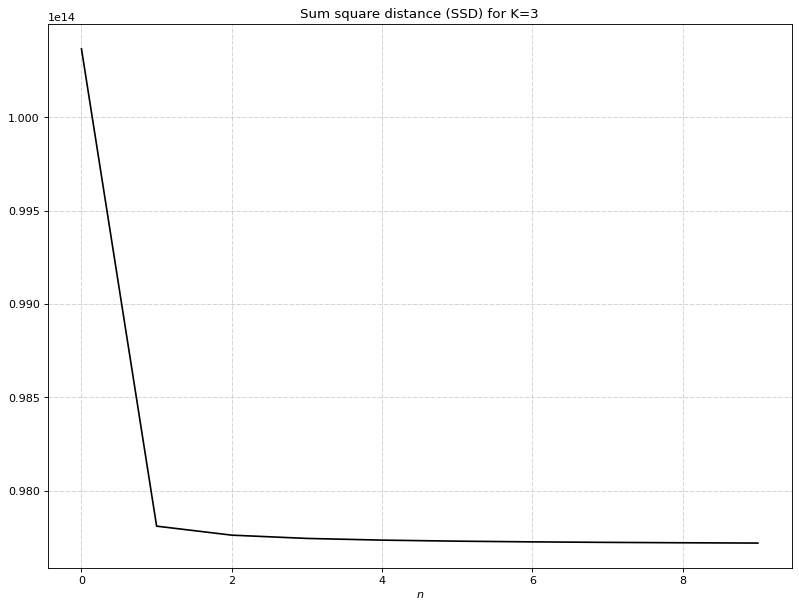

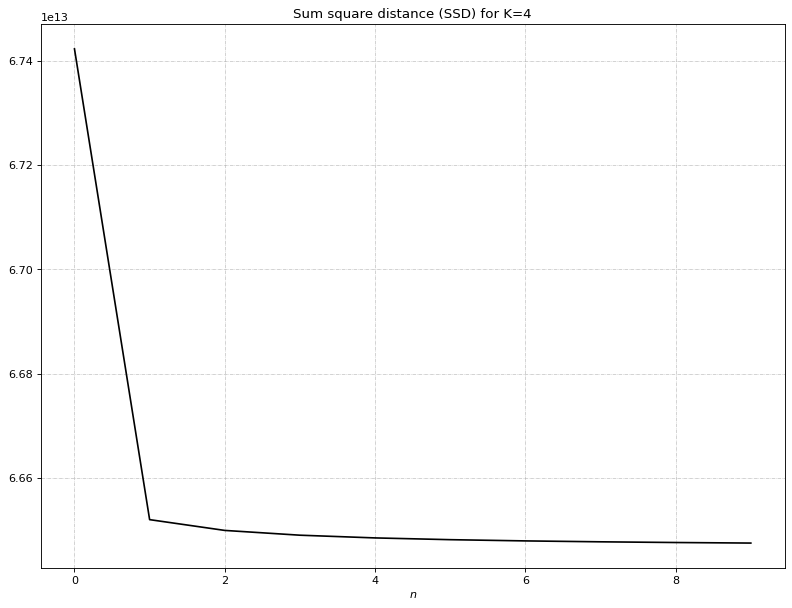

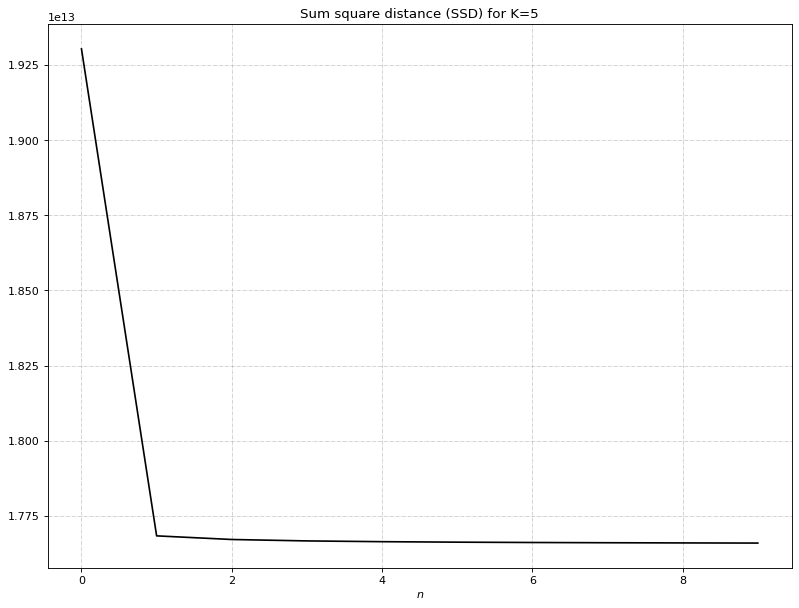

In [5]:
from numpy import genfromtxt, empty, array, argmin, amin, mean, arange
from numpy.linalg import norm
from numpy.random import permutation
import matplotlib.pyplot as plt

X = genfromtxt('./data/datasetTC3.dat', dtype=float, delimiter='\t').T

all_K = range(2,7)
p, N = X.shape
# number of iterations
N_iter = 10
# sum square distance (SSD)
SSD = empty(N_iter)
# set of all partitions
V = {}

min_dist = empty(N)

all_K = range(2,6)
for K in all_K:
    i = permutation(N)
    # initialize W with k random instances
    W = X[:, i[:K]]
    C = zeros(K)
    for n_iter in range(N_iter):
        # for each instance vector x
        for n in range(N):
            # all distancies from all vectors to the k-th prototype
            dist2w = array([norm(X[:,n] - W[:,k]) for k in range(K)])
            # index of the closest prototype, w, to the n-th vector
            min_dist[n], min_disti[n] = amin(dist2w), argmin(dist2w)
            C[min_disti[n]] += 1
            # update equation
            alpha = 1/C[min_disti[n]]
            W[:,min_disti[n]] = (1 - alpha)*W[:,min_disti[n]] + alpha*X[:,n]

        # sum up all
        SSD[n_iter] = sum(min_dist**2)
        
    fig = plt.figure(figsize=(12, 9), dpi=80)
    ax = fig.gca()
    ax.set_axisbelow(True)
    ax.plot(SSD, 'k')
    ax.grid(True, linestyle='-.', linewidth=.5)
    plt.xlabel(r'$n$')
    plt.title(f'Sum square distance (SSD) for K={K}')
    print(f'####### For K={K} #######')
    for k in range(K):
        print(f'The final value for the {k}-th prototype is {W[:,k]}')
    print('\n\n')
plt.show()